<a href="https://colab.research.google.com/github/Satwikram/HuggingFace/blob/main/Fine-tuning%20a%20masked%20language%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

### Setup

In [ ]:
!pip install transformers

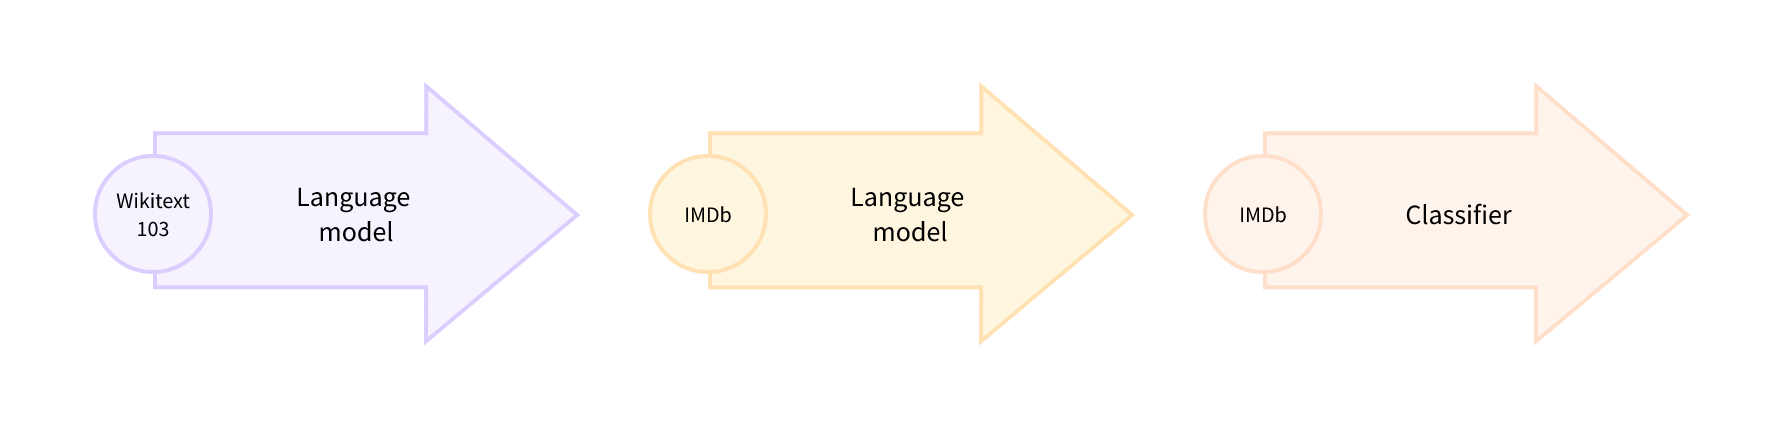

### Importing Dependencies

In [9]:
from transformers import TFAutoModelForMaskedLM, AutoTokenizer
import numpy as np
import tensorflow as tf

### Initializing the model

In [3]:
model_checkpoint = "distilbert-base-uncased"
model = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForMaskedLM: ['activation_13']
- This IS expected if you are initializing TFDistilBertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertForMaskedLM were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForMaskedLM for predictions without further training.


In [4]:
model.summary()

Model: "tf_distil_bert_for_masked_lm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 vocab_transform (Dense)     multiple                  590592    
                                                                 
 vocab_layer_norm (LayerNorm  multiple                 1536      
 alization)                                                      
                                                                 
 vocab_projector (TFDistilBe  multiple                 23866170  
 rtLMHead)                                                       
                                                                 
Total params: 66,985,530
Trainable params: 66,985,530
Non-trainable params: 0
__________________________

In [5]:
text = "This is a great [MASK]."

### Tokenization

In [8]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

With a tokenizer and a model, we can now pass our text example to the model, extract the logits, and print out the top 5 candidates:

In [10]:
inputs = tokenizer(text, return_tensors="np")

In [11]:
inputs

{'input_ids': array([[ 101, 2023, 2003, 1037, 2307,  103, 1012,  102]]), 'attention_mask': array([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [12]:
token_logits = model(**inputs).logits

In [13]:
token_logits

<tf.Tensor: shape=(1, 8, 30522), dtype=float32, numpy=
array([[[ -5.588161 ,  -5.5868373,  -5.5958486, ...,  -4.9447727,
          -4.8174024,  -2.9905226],
        [-11.90314  , -11.887163 , -12.062249 , ..., -10.95697  ,
         -10.646375 ,  -8.632356 ],
        [-11.960378 , -12.152035 , -12.127866 , ..., -10.021761 ,
          -8.607408 ,  -8.097103 ],
        ...,
        [ -4.8227916,  -4.6267867,  -5.104059 , ...,  -4.2771416,
          -5.018431 ,  -3.9427614],
        [-11.294456 , -11.23876  , -11.385687 , ...,  -9.206297 ,
          -9.341139 ,  -6.1504908],
        [ -9.521323 ,  -9.4632225,  -9.502177 , ...,  -8.6560955,
          -8.490813 ,  -4.6902914]]], dtype=float32)>

In [15]:
inputs["input_ids"]

array([[ 101, 2023, 2003, 1037, 2307,  103, 1012,  102]])

In [16]:
tokenizer.mask_token_id

103

In [20]:
np.argwhere(inputs["input_ids"] == tokenizer.mask_token_id)[0, 1]

5

In [21]:
# Find the location of [MASK] and extract its logits
mask_token_index = np.argwhere(inputs["input_ids"] == tokenizer.mask_token_id)[0, 1]
mask_token_logits = token_logits[0, mask_token_index, :]

In [24]:
mask_token_logits

<tf.Tensor: shape=(30522,), dtype=float32, numpy=
array([-4.8227916, -4.6267867, -5.104059 , ..., -4.2771416, -5.018431 ,
       -3.9427614], dtype=float32)>

In [25]:
# Pick the [MASK] candidates with the highest logits
# We negate the array before argsort to get the largest, not the smallest, logits
top_5_tokens = np.argsort(-mask_token_logits)[:5].tolist()

for token in top_5_tokens:
    print(f">>> {text.replace(tokenizer.mask_token, tokenizer.decode([token]))}")

>>> This is a great deal.
>>> This is a great success.
>>> This is a great adventure.
>>> This is a great idea.
>>> This is a great feat.
